In [1]:
from numpy import load
import numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from bitstring import BitArray
import random
from random import randint
import matplotlib.pyplot as plt
import math
import tensorflow
import torch

from tensorflow.keras.models import model_from_json
import os

In [2]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")

w = np.array(model.get_weights())
print(w)

model.set_weights(w)




Loaded model from disk
[array([[-0.00532808, -0.05634539, -0.01137742, ...,  0.00923991,
         0.07452757,  0.00907326],
       [ 0.05137911,  0.05812998,  0.04447611, ...,  0.08329046,
         0.01642003, -0.00044306],
       [ 0.02186788, -0.04802764,  0.01658922, ..., -0.02079115,
        -0.00830136, -0.05003768],
       ...,
       [ 0.01964866, -0.01119061,  0.04589513, ...,  0.01776223,
         0.08426769, -0.06542568],
       [ 0.07329586, -0.04803493,  0.02275234, ...,  0.08049426,
         0.04118011, -0.05224337],
       [ 0.03500667,  0.03121211,  0.0386678 , ...,  0.09668488,
         0.02840985,  0.03144827]], dtype=float32)
 array([-0.01711365, -0.01213954, -0.00599254, -0.00734478, -0.05629872,
        0.02248463, -0.02807377, -0.00710868, -0.00639182, -0.03171001,
       -0.00754629, -0.02898392, -0.00097148, -0.0681415 , -0.03661139,
       -0.0153906 ,  0.01178204, -0.04046743, -0.00194255, -0.01513141,
       -0.00843685, -0.01373856, -0.04758079, -0.02079848, 

<ipython-input-2-f5828c680f02>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  w = np.array(model.get_weights())


In [3]:

w2 = abs(w)
m1 = 0
maxw = []

In [4]:
for i in range (0,len(w2)):
    m1 = np.amax(w2[i])
    maxw.append(m1)
mw = np.amax(maxw)
w = w/mw
w = w * 127

In [80]:
for i in range(0,6):
    w[i] = w[i].astype('int')

print (type(w[0]))


<class 'numpy.ndarray'>


In [8]:
weights = [w[0], w[2], w[4], w[6]]

# network architecture
#256-256-256-10

In [164]:
missing_values = []
for layer in weights:
    print(layer)

[[ 6 10 -1 ...  1 -8  1]
 [ 2  7  5 ... 10  2  2]
 [14 -6 14 ... -2 14 -6]
 ...
 [ 2 -1  7 ...  2  7 -8]
 [ 9 -6  2 ... 10  5 -6]
 [ 4  3  4 ... 12  3  3]]
[[  2 -10 -21 ... -14  -8  -9]
 [ -6  -2  -4 ... -28 -28 -13]
 [-13   6   7 ... -10   3 -11]
 ...
 [-10   5 -11 ... -12  -9   1]
 [  8 -10  12 ... -18  19   7]
 [-10   7 -19 ... -22 -43 -16]]
[[ 16  17  -4 ... -28  -3  -9]
 [ 12 -29  -9 ...  -2  -2  -4]
 [ -6 -16  22 ... -14 -29  -9]
 ...
 [  2  -3  18 ...   8 -17 -16]
 [  0 -22  29 ...   0  -1  -9]
 [  1   8  -4 ...  19  -8 -10]]
[[ -4.887619   -4.887619   -4.887619  ...  -2.4868052  22.479237
   -2.0484543]
 [  7.8650694 -18.10992     8.076795  ... -15.625489  -15.625489
  -15.625489 ]
 [ 13.334781   -3.9967995  -3.9967995 ...  -1.053975   -1.053975
   -1.053975 ]
 ...
 [ -8.410854   -8.410854   -8.410854  ... -12.770885  -16.492294
  -16.492294 ]
 [-50.7951    -50.7951     18.993296  ...   1.8378216   1.8378216
    1.8378216]
 [  8.1063385   8.1063385 -11.84227   ... -10.384981  

In [6]:
# Duplication function
def dupWeights(num_weight, weights):
    for layer in weights:
        n = num_weight
        while(n > 0):
            
            # random weight index
            vec = layer[random.randrange(0, layer.size)]
            index = random.randrange(0, vec.size)
            missing_values.append(vec[index])
            # neighbor of random weight index
            neighbor = index
            if(index != vec.size - 1):
                neighbor += 1
            else: 
                neighbor -= 1

            # duplicate random indeces
            duplicate(vec[index], vec[neighbor], vec)

        # decrement num counter
            n = n - 1

    return weights

       

In [270]:
# duplicate only one of the weights in each layer
dup_arr = dupWeights(2, weights)

In [214]:
w[0] = dup_arr[0] 
w[2] = dup_arr[1] 
w[4] = dup_arr[2] 
w[6] = dup_arr[3] 


In [215]:
# change model weights to duplicated weights
model.set_weights(w)

In [5]:
# load mnist training and testing data
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [6]:
# Normalize the images
train_images = (train_images/255) - 0.5
test_images = (test_images / 255) - 0.5

In [7]:
# Flatten the images
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [219]:
# compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [220]:
# Evaluate the model
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 1s 3ms/step - loss: 69316264.0000 - accuracy: 0.8798


[69316264.0, 0.879800021648407]

In [8]:
# flatten layer
wf0 = w[0].flatten()
wf1 = w[2].flatten()
wf2 = w[4].flatten()
wf3 = w[6].flatten()

In [13]:
def duplicate(num1, num2, arr):
    count = 0
    for val in arr:
        if(val == num2):
            arr[count] = num1
        count += 1
    return arr

In [14]:
def find(x, arr):
    for val in arr:
        if(val == x):
            print("Found")
    print("Not Found")

In [21]:
def duplication(number_of_duplications, flat_layer, layer_index):
    
    """
    flat_layer: flatten hidden weights from the model
    layer_index: index to hidden weights
    number_of_duplications: number of weights being duplicated
    """
    
    n = number_of_duplications
    # get random values for each layer
    while(n > 0):
        r00 = random.randrange(0, len(flat_layer) - 1)
        r01 = r00 + 1
        # Duplicate random value
        flat_layer = duplicate(flat_layer[r00], flat_layer[r01], flat_layer)
        n -= 1

    

    # reshape layer
    wf00 = flat_layer.reshape(w[layer_index].shape)
    w[layer_index] = wf00 

In [22]:
def get_accuracy():
    # change model weights to duplicated weights
    model.set_weights(w)

    # predict on the 1000 test images
    predictions = model.predict(test_images[:10000])

    # print our model's predictions
    #print(np.argmax(predictions, axis=1)) 


    # check our predictions against the ground truths
    #print(test_labels[:1000])

    x = np.argmax(predictions, axis=1)
    y = test_labels[:10000]

    count = 0
    for i in range (0, 10000):
        if x[i] == y[i]:
            count = count + 1
    # get accuracy of model with for loop
    #print("accuracy =", count / 10000)
    return (count / 10000)

In [27]:
accuracies = []
accuracies.append(get_accuracy())
n = 0
while(n < 30):
    # duplicate each layer of the model
    count = 0
    sum_accuracies = 0
    while(count < 10):
        duplication(1, wf0, 0)
        duplication(1, wf1, 2)
        duplication(1, wf2, 4)
        duplication(1, wf3, 6)
        accuracy = get_accuracy()
        print("n = ", n, " accuracy ", accuracy)
        sum_accuracies += accuracy
        
        count += 1
        
    
    # get accuracy of model after each duplication
    accuracies.append(sum_accuracies / 10)
    # increment n
    n += 1

n =  0  accuracy  0.904
n =  0  accuracy  0.887
n =  0  accuracy  0.887
n =  0  accuracy  0.8869
n =  0  accuracy  0.887
n =  0  accuracy  0.8861
n =  0  accuracy  0.8859
n =  0  accuracy  0.886
n =  0  accuracy  0.8859
n =  0  accuracy  0.8854
n =  1  accuracy  0.8854
n =  1  accuracy  0.8854
n =  1  accuracy  0.8848
n =  1  accuracy  0.8849
n =  1  accuracy  0.8849
n =  1  accuracy  0.885
n =  1  accuracy  0.8849
n =  1  accuracy  0.8851
n =  1  accuracy  0.8851
n =  1  accuracy  0.8851
n =  2  accuracy  0.8868
n =  2  accuracy  0.8867
n =  2  accuracy  0.8867
n =  2  accuracy  0.8868
n =  2  accuracy  0.8867
n =  2  accuracy  0.8867
n =  2  accuracy  0.8867
n =  2  accuracy  0.8867
n =  2  accuracy  0.8866
n =  2  accuracy  0.8865
n =  3  accuracy  0.8868
n =  3  accuracy  0.8868
n =  3  accuracy  0.8871
n =  3  accuracy  0.887
n =  3  accuracy  0.887
n =  3  accuracy  0.8831
n =  3  accuracy  0.8831
n =  3  accuracy  0.8827
n =  3  accuracy  0.884
n =  3  accuracy  0.8839
n =  4  a

In [28]:
print(accuracies)
x = []
for val in range(30):
    x.append(val + 1)

[0.9042, 0.8881200000000001, 0.8850599999999998, 0.8866900000000001, 0.88515, 0.88256, 0.8766599999999999, 0.8744, 0.88452, 0.8984100000000002, 0.89695, 0.8969999999999999, 0.8966899999999999, 0.89589, 0.8953799999999997, 0.87062, 0.8575900000000001, 0.8501800000000002, 0.8516699999999998, 0.8582099999999999, 0.85631, 0.8527699999999999, 0.8486900000000002, 0.84755, 0.8393799999999999, 0.8301699999999999, 0.85455, 0.8507, 0.84684, 0.8437899999999999, 0.8370200000000001]


In [99]:
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


ValueError: The number of FixedLocator locations (31), usually from a call to set_ticks, does not match the number of ticklabels (30).

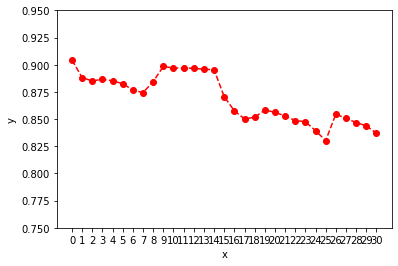

In [30]:
# create an index for each tick position
# x was created above
xi = list(range(len(x) + 1))
y = accuracies
plt.ylim(0.75,.95)
# plot the index for the x-values
plt.plot(xi, y, marker='o', linestyle='--', color='r', label='Square') 
plt.xlabel('x')
plt.ylabel('y') 
plt.xticks(xi, x)
plt.title('compare')
plt.legend() 
plt.show()